In [10]:
%load_ext autoreload
%autoreload 2

In [57]:
dataset_path = "../datasets/data/img/"  # Pfad zu den Bildern
meta_data_csv_path = "../datasets/data/train.csv"  # Pfad zur Meta-Daten CSV
dataset = BreastCancerDataset(img_dir=dataset_path, meta_data_csv_path=meta_data_csv_path)



In [119]:
def plot_samples(dataset, n=5):
    fig, axs = plt.subplots(1, n, figsize=(20, 4))
    for i in range(n):
        sample = dataset[i]
        image = sample["image"]

        if isinstance(image, torch.Tensor):
            image = image.numpy()

        if image.shape[0] == 1:
            image = image.squeeze(0)

        else:
            image = np.transpose(image, (1, 2, 0))

        axs[i].imshow(image, cmap="gray" if image.ndim == 2 else None)
        axs[i].set_title(f"Anomaly: {sample['is_anomaly']}")
        axs[i].axis("off")

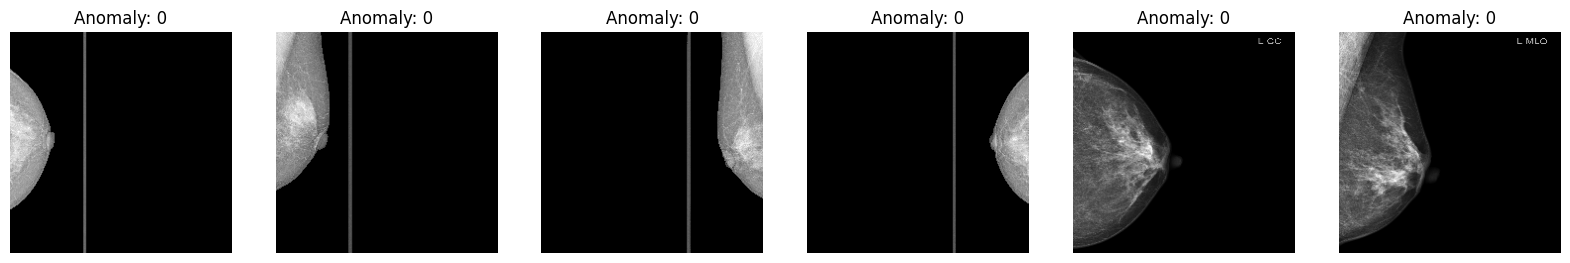

In [120]:
plot_samples(dataset, n=6)

In [60]:
from datasets.rsna_breast_cancer import BreastCancerDataset

_DATASETS = {
    "BreastCancerDataset": ["datasets.rsna_breast_cancer", "BreastCancerDataset"]
}
name = "BreastCancerDataset"
dataset_info = _DATASETS[name]
dataset_library = __import__(dataset_info[0], fromlist=[dataset_info[1]])
dataset_info[1]


'BreastCancerDataset'

In [61]:
train_dataset = BreastCancerDataset(img_dir=dataset_path, meta_data_csv_path=meta_data_csv_path,
                                    split=DatasetSplit.TRAIN)
test_dataset = BreastCancerDataset(img_dir=dataset_path, meta_data_csv_path=meta_data_csv_path, split=DatasetSplit.TEST)
val_dataset = BreastCancerDataset(img_dir=dataset_path, meta_data_csv_path=meta_data_csv_path, split=DatasetSplit.VAL)

In [62]:
print(f"Dataset: train={len(train_dataset)} test={len(test_dataset)} val={len(val_dataset)}")


Dataset: train=38294 test=5471 val=10941


In [63]:
train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=1,
    prefetch_factor=2,
    pin_memory=True,
)
test_dataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=1,
    prefetch_factor=2,
    pin_memory=True,
)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=1,
    prefetch_factor=2,
    pin_memory=True,
)

In [64]:
dataloaders = {
                "training": train_dataloader,
                "validation": val_dataloader,
                "testing": test_dataloader,
            }

In [65]:
imagesize = dataloaders["training"].dataset.imagesize


In [109]:
imagesize

224

In [96]:
device = utils.set_torch_device([])


In [97]:
device

device(type='cpu')

In [107]:
backbone_names=['wideresnet50']
layers_to_extract_from =['layer2','layer3']
pretrain_embed_dimension=1536
target_embed_dimension=1536
layers_to_extract_from_coll = [layers_to_extract_from]

def get_simplenet(input_shape, device):
        simplenets = []
        for backbone_name, layers_to_extract_from in zip(
            backbone_names, layers_to_extract_from_coll
        ):
            backbone_seed = None
            if ".seed-" in backbone_name:
                backbone_name, backbone_seed = backbone_name.split(".seed-")[0], int(
                    backbone_name.split("-")[-1]
                )
            backbone = backbones.load(backbone_name)
            backbone.name, backbone.seed = backbone_name, backbone_seed

            simplenet_inst = simplenet.SimpleNet(device)
            simplenet_inst.load(
                backbone=backbone,
                layers_to_extract_from=layers_to_extract_from,
                device=device,
                input_shape=input_shape,
                pretrain_embed_dimension=pretrain_embed_dimension,
                target_embed_dimension=target_embed_dimension
            )
            simplenets.append(simplenet_inst)
        return simplenets

In [121]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

simplenet_list = get_simplenet([1,imagesize,imagesize],device)

RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[1, 1, 224, 224] to have 3 channels, but got 1 channels instead

In [ ]:
simplenet_list

In [63]:
from datasets.rsna_breast_cancer import BreastCancerDataset
import os


img_dir ='/Users/xgxtphg/Documents/git/SimpleNet/data/cropped_voi_lut'

csv_file = '/Users/xgxtphg/Documents/git/SimpleNet/train.csv'

train_ds = BreastCancerDataset(
    img_dir=img_dir,
    meta_data_csv_path=csv_file,
    num_images=(10000, 0, 768, 0),
    resize=(256,256)
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


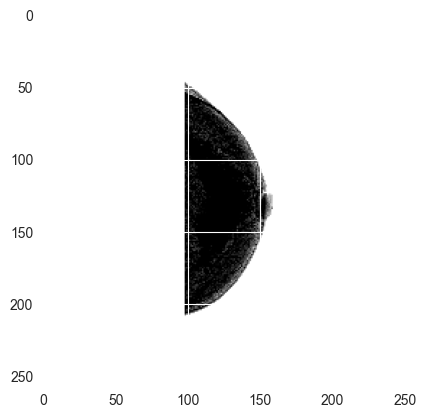

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


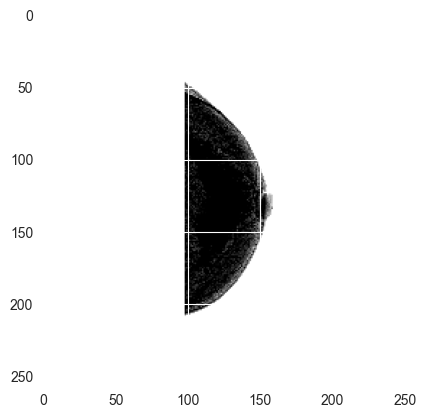

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10006_462822612.png


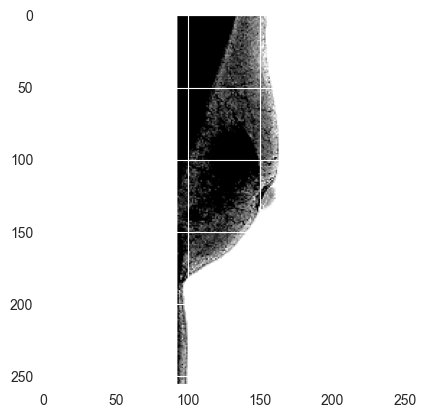

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


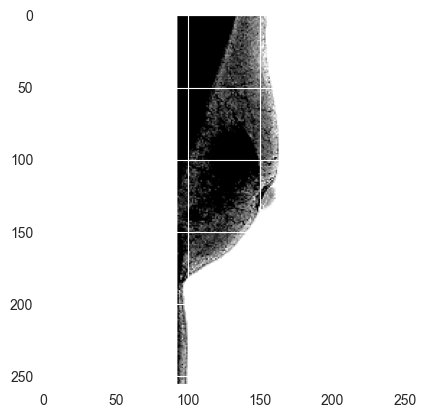

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10006_1459541791.png


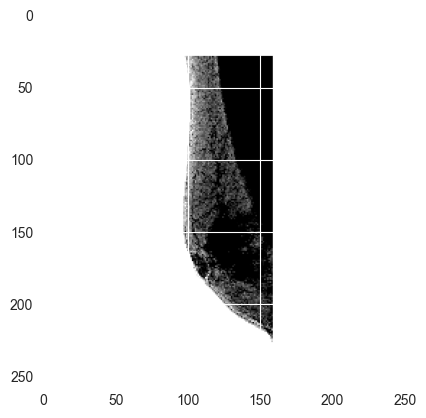

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


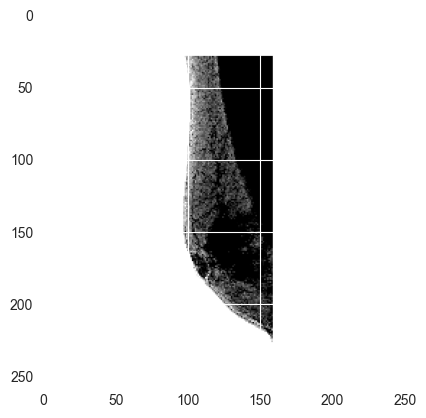

10006_1864590858.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


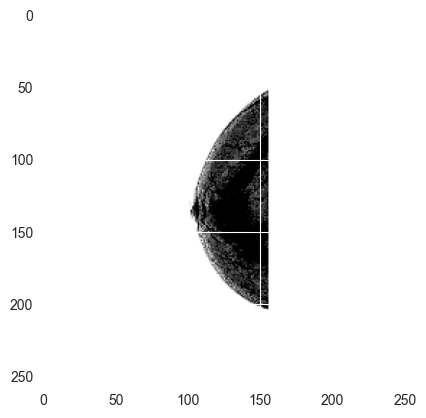

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


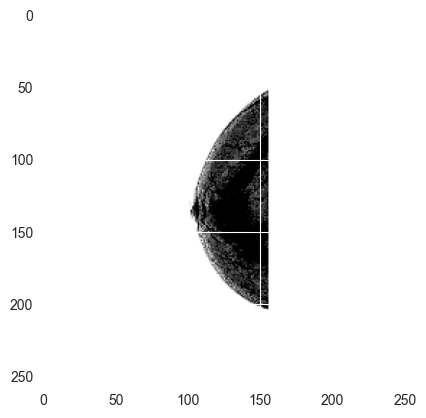

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10006_1874946579.png


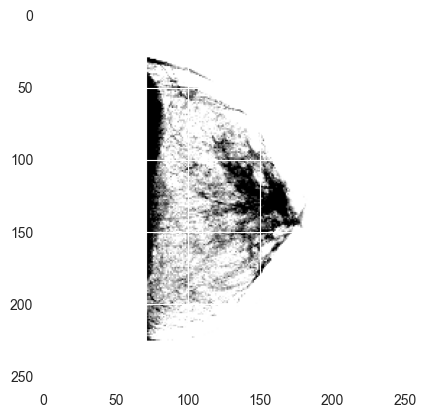

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


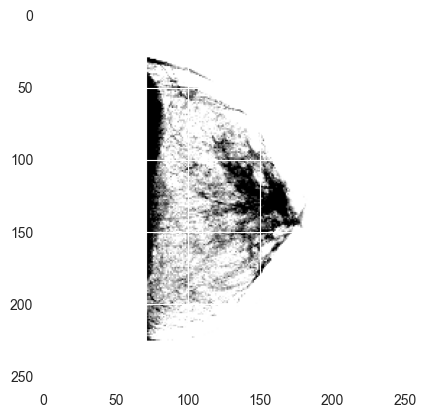

10011_220375232.png


In [68]:
for i in range(5):
    train_ds.__getitem__(i)
    print(train_ds.__getitem__(i)['image_name'])

TypeError: Invalid shape (3, 679, 256) for image data

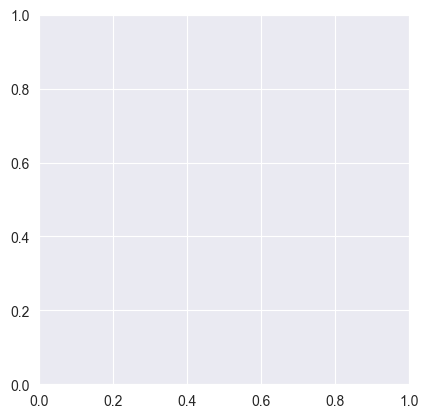

In [14]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt# Convert from tensor to PIL Image
# image = transforms.ToPILImage()(train_ds.__getitem__(0)['image'])
image = train_ds.__getitem__(0)['image'].numpy()
# Display the image
plt.imshow(image)
plt.show()

In [8]:
train_ds.__getitem__(0)

{'image': tensor([[[ 0.3481,  0.3481,  0.2111,  ..., -1.1075, -1.1075, -1.1075],
          [ 0.3481,  0.3481,  0.2111,  ..., -1.1075, -1.1075, -1.1075],
          [ 0.3823,  0.3823,  0.2624,  ..., -1.1075, -1.1075, -1.1075],
          ...,
          [ 0.2967,  0.2967,  0.1768,  ..., -1.1075, -1.1075, -1.1075],
          [ 0.2453,  0.2453,  0.1083,  ..., -1.1075, -1.1075, -1.1075],
          [ 0.2453,  0.2453,  0.1083,  ..., -1.1075, -1.1075, -1.1075]],
 
         [[ 0.3481,  0.3481,  0.2111,  ..., -1.1075, -1.1075, -1.1075],
          [ 0.3481,  0.3481,  0.2111,  ..., -1.1075, -1.1075, -1.1075],
          [ 0.3823,  0.3823,  0.2624,  ..., -1.1075, -1.1075, -1.1075],
          ...,
          [ 0.2967,  0.2967,  0.1768,  ..., -1.1075, -1.1075, -1.1075],
          [ 0.2453,  0.2453,  0.1083,  ..., -1.1075, -1.1075, -1.1075],
          [ 0.2453,  0.2453,  0.1083,  ..., -1.1075, -1.1075, -1.1075]],
 
         [[ 0.3481,  0.3481,  0.2111,  ..., -1.1075, -1.1075, -1.1075],
          [ 0.3481,